# Retail Data Processing and Analysis

1. Import the retail_shop_data file and view the first 5 rows.  Write another code to check how many rows and columns are in the DataFrame. Are there any duplicates?
2. Create a copy of the DataFrame. Now, write another line  of code to rename columns: "Total" to "Revenue," "Price" to "Price Per Product," and "Cost" to "Cost Per Product."
3. Calculate the total cost of products and add this as a  column to the DataFrame. Name this column: Costs. Calculate the difference between total revenue and total expenses. Name this column: Profit.
4. Add another column called "Filter." This column should  check for all products that have a profit margin above 15 dollars. If a product has a profit margin of over 15 dollars, it should be given a value of True; otherwise, it should be False.
5. Which products have a profit margin of over 15 dollars? Use pandas
6. Using pandas, write code to check the difference in profit between jackets and sneakers.
7. Using pandas, what is the difference in costs between the  most profitable product and the least profitable product.
8. Write code to access the total costs of jackets (using the .loc attribute).
9. Using Matplotlib, create a bar stack plot of the sales, costs,and profits of the 6 least profitable products. The bar plot should be sorted by profit in ascending order.
10. Using .loc attribute, calculate the profit of the sunglasses.
11. Using .loc attribute, calculate the profit of hoodies.
12. Using .iloc attribute, return the names of the two least profitable products.
13. Using the .loc attribute, return a DataFrame subset of the most profitable product.
14. Using the Seaborn library, create a scatter plot to visualize the relationship between sales and costs for each product. Is there any noticeable correlation?


### 1. Import the retail_shop_data file and view the first 5 rows. Check how many rows and columns are in the DataFrame. Check for duplicates.

In [3]:
import pandas as pd

file_path = 'retail_shop_data.csv'
df = pd.read_csv(file_path)

df.head()

,Date,Customer ID,Product ID,Product Name,Cost,Price,Quantity,Total
0,1 01 2023,1001,101,T-Shirt,18,20,2,40
1,1 01 2023,1002,102,Jeans,35,50,1,50
2,2 01 2023,1003,103,Hoodie,25,30,3,90
3,3 01 2023,1004,104,Sneakers,55,70,2,140
4,3 01 2023,1005,105,Sunglasses,17,25,1,25


In [5]:
df.shape

(21, 8)

In [6]:
df.duplicated().sum()

0

### 2. Create a copy of the DataFrame and rename columns.

In [7]:
df_copy = df.copy()
df_copy.rename(columns={"Total": "Revenue", "Price": "Price Per Product", "Cost": "Cost Per Product"}, inplace=True)
df_copy.head()

,Date,Customer ID,Product ID,Product Name,Cost Per Product,Price Per Product,Quantity,Revenue
0,1 01 2023,1001,101,T-Shirt,18,20,2,40
1,1 01 2023,1002,102,Jeans,35,50,1,50
2,2 01 2023,1003,103,Hoodie,25,30,3,90
3,3 01 2023,1004,104,Sneakers,55,70,2,140
4,3 01 2023,1005,105,Sunglasses,17,25,1,25


### 3. Calculate total cost of products and add this as a column "Costs". Calculate the profit and add this as a column "Profit".

In [8]:
df_copy['Costs'] = df_copy['Cost Per Product'] * df_copy['Quantity']
df_copy['Profit'] = df_copy['Revenue'] - df_copy['Costs']
df_copy.head()

,Date,Customer ID,Product ID,Product Name,Cost Per Product,Price Per Product,Quantity,Revenue,Costs,Profit
0,1 01 2023,1001,101,T-Shirt,18,20,2,40,36,4
1,1 01 2023,1002,102,Jeans,35,50,1,50,35,15
2,2 01 2023,1003,103,Hoodie,25,30,3,90,75,15
3,3 01 2023,1004,104,Sneakers,55,70,2,140,110,30
4,3 01 2023,1005,105,Sunglasses,17,25,1,25,17,8


### 4. Add a column "Filter" to check for products with a profit margin above 15 dollars.

In [9]:
df_copy['Filter'] = df_copy['Profit'] > 15

df_copy.head()

,Date,Customer ID,Product ID,Product Name,Cost Per Product,Price Per Product,Quantity,Revenue,Costs,Profit,Filter
0,1 01 2023,1001,101,T-Shirt,18,20,2,40,36,4,False
1,1 01 2023,1002,102,Jeans,35,50,1,50,35,15,False
2,2 01 2023,1003,103,Hoodie,25,30,3,90,75,15,False
3,3 01 2023,1004,104,Sneakers,55,70,2,140,110,30,True
4,3 01 2023,1005,105,Sunglasses,17,25,1,25,17,8,False


### 5. Which products have a profit margin of over 15 dollars?

In [10]:
high_profit_products = df_copy[df_copy['Filter']]
print(high_profit_products)

         Date  Customer ID  Product ID Product Name  Cost Per Product  \
3   3 01 2023         1004         104     Sneakers                55   
7   6 01 2023         1008         108       Jacket                63   
13  9 01 2023         1008         108       Jacket                63   

    Price Per Product  Quantity  Revenue  Costs  Profit  Filter  
3                  70         2      140    110      30    True  
7                  80         1       80     63      17    True  
13                 80         2      160    126      34    True  


In [11]:
high_profit_products['Product Name'].tolist()

['Sneakers', 'Jacket', 'Jacket']

### 6. Check the difference in profit between jackets and sneakers.

In [12]:
jacket_profit = df_copy[df_copy['Product Name'] == 'Jacket']['Profit'].sum()
sneakers_profit = df_copy[df_copy['Product Name'] == 'Sneakers']['Profit'].sum()
profit_difference = jacket_profit - sneakers_profit

print(profit_difference)

21


### 7. Difference in costs between the most profitable product and the least profitable product.

In [13]:
most_profitable = df_copy.loc[df_copy['Profit'].idxmax()]
least_profitable = df_copy.loc[df_copy['Profit'].idxmin()]

cost_difference = most_profitable['Costs'] - least_profitable['Costs']

print(cost_difference)

98


### 8. Access the total costs of jackets using the .loc attribute.

In [14]:
jacket_costs = df_copy.loc[df_copy['Product Name'] == 'Jacket', 'Costs'].sum()

print(jacket_costs)

189


### 9. Create a bar stack plot of the sales, costs, and profits of the 6 least profitable products.

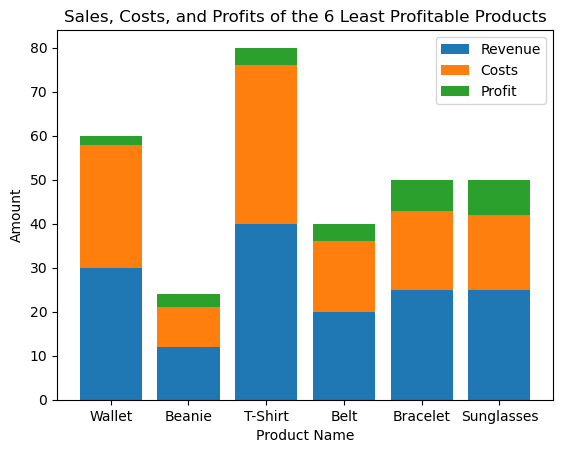

In [15]:
import matplotlib.pyplot as plt

least_profitable_products = df_copy.nsmallest(6, 'Profit')

plt.bar(least_profitable_products['Product Name'], least_profitable_products['Revenue'], label='Revenue')
plt.bar(least_profitable_products['Product Name'], least_profitable_products['Costs'], bottom=least_profitable_products['Revenue'], label='Costs')
plt.bar(least_profitable_products['Product Name'], least_profitable_products['Profit'], bottom=least_profitable_products['Costs']+least_profitable_products['Revenue'], label='Profit')

plt.xlabel('Product Name')
plt.ylabel('Amount')
plt.title('Sales, Costs, and Profits of the 6 Least Profitable Products')
plt.legend()

plt.show()

### 10. Calculate the profit of the sunglasses using the .loc attribute.

In [16]:
sunglasses_profit = df_copy.loc[df_copy['Product Name'] == 'Sunglasses', 'Profit'].sum()

print(sunglasses_profit)

8


### 11. Calculate the profit of hoodies using the .loc attribute.

In [17]:
hoodies_profit = df_copy.loc[df_copy['Product Name'] == 'Hoodie', 'Profit'].sum()

print(hoodies_profit)

15


### 12. Return the names of the two least profitable products using the .iloc attribute.

In [18]:
least_profitable_names = df_copy.nsmallest(2, 'Profit')['Product Name']

print(least_profitable_names)

16    Wallet
12    Beanie
Name: Product Name, dtype: object


### 13. Return a DataFrame subset of the most profitable product using the .loc attribute.

In [19]:
most_profitable_subset = df_copy.loc[df_copy['Profit'].idxmax()]

print(most_profitable_subset)

Date                 9 01 2023
Customer ID               1008
Product ID                 108
Product Name            Jacket
Cost Per Product            63
Price Per Product           80
Quantity                     2
Revenue                    160
Costs                      126
Profit                      34
Filter                    True
Name: 13, dtype: object


### 14. Create a scatter plot to visualize the relationship between sales and costs for each product using Seaborn.

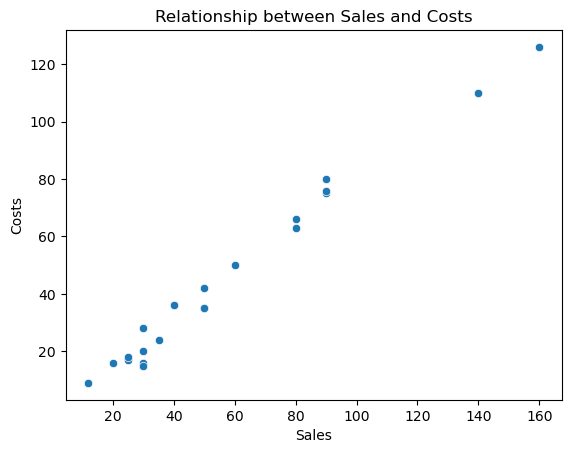

In [20]:
import seaborn as sns

sns.scatterplot(x='Revenue', y='Costs', data=df_copy)

plt.xlabel('Sales')
plt.ylabel('Costs')
plt.title('Relationship between Sales and Costs')
plt.show()